<a href="https://www.kaggle.com/code/ansh2212/machine-learning?scriptVersionId=99187590" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pricingdata/House-Price-data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('../input/pricingdata/House-Price-data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS  ', 'CHAS', 'NOX', ' RM ', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

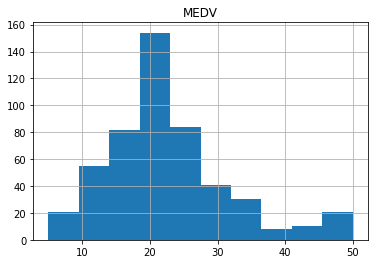

In [5]:
df.hist('MEDV')
plt.show()

#def split_train_test(data,test_ratio):
 #   shuffled = np.random.permutation(len(data))
  #  np.random.seed(42)
   # test_set_size = int(len(data)* test_ratio)
    #test_indices = shuffled[:test_set_size]
    #train_indices = shuffled[test_set_size:]
    #return data.iloc[train_indices],data.iloc[test_indices]

In [6]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)
print(f'Total train set are {len(train_set)}\nTotal test set are {len(test_set)}')

Total train set are 404
Total test set are 102


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1 ,test_size=0.2 ,random_state=42)
for train_index,test_index in split.split(df,df['CHAS']):
    strat_train_test = df.loc[train_index]
    strat_test_test = df.loc[test_index]

In [8]:
strat_train_test['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [9]:
strat_test_test['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [10]:
df=strat_train_test.copy()

In [11]:
corr_matrix=df.corr()

In [12]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
 RM        0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

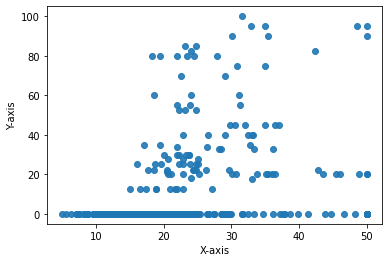

In [13]:
plt.scatter(df.MEDV ,df.ZN , alpha=0.9)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

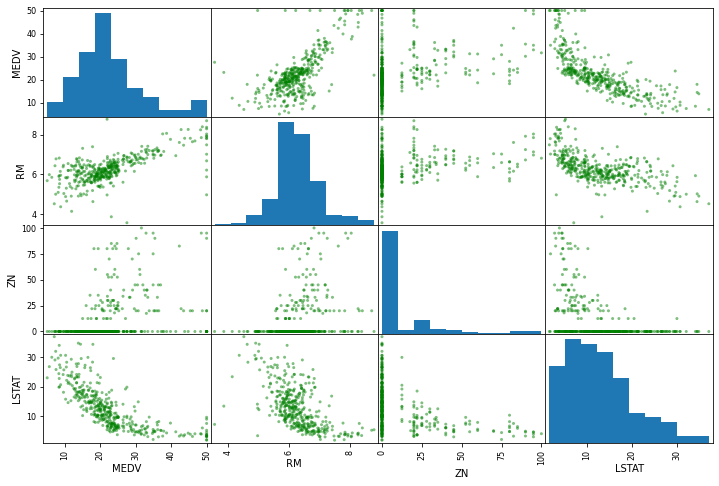

In [14]:
from pandas.plotting import scatter_matrix
a=['MEDV',' RM ','ZN','LSTAT']
scatter_matrix(df[a],figsize=(12,8), c='green')
plt.show()

In [15]:
df['TAXRM']=df['TAX']/df[' RM ']

In [16]:
corr_matrix=df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
 RM        0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [17]:
df=strat_train_test.drop('MEDV',axis=1)
df_label=strat_train_test['MEDV'].copy()

**If there is null value in the data set ::**
****a = df.dropna(subset=['RM'],inplace=true)
# Instead of this we can import SimpleImputer from Impute

In [18]:
#Before filling the missing training data(Imputer)
df.describe() #Didn't have any null values thats why values are same in both describe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [19]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy= 'median')
impute.fit(df)

SimpleImputer(strategy='median')

In [20]:
impute.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [21]:
x=impute.transform(df)

In [22]:
df_tr= pd.DataFrame(x,columns=df.columns)

In [23]:
df_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# **USING SCIKIT-LEARN**

**There are 3 types of objects**
*1) Estimators
2) Transformers
3) Predictors*

**Feature Scaling**
Two Types of methods:
:Min-max scaling(Normalization)
= [value - min/(max-min)]
SKlearn Provides MinMaxScaler for this


:Standardization
= [value - mean/std]
SKlearn provides a class called Standard Scaler for this**

In [24]:
#Creating a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [25]:
df_num_tr=my_pipeline.fit_transform(df)

In [26]:
df_num_tr.shape

(404, 13)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#model=LinearRegression()
model=DecisionTreeRegressor()
model.fit(df_num_tr,df_label)

DecisionTreeRegressor()

In [28]:
some_data=df.iloc[:5]
some_label=df_label.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [29]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating The Model

In [30]:
from sklearn.metrics import mean_squared_error
df_predictions =model.predict(df_num_tr)
evaluating=mean_squared_error(df_label,df_predictions)
root_mean=np.sqrt(evaluating)

In [31]:
##In linear Regression root_mean is 4.8 and in decision tree it is 0.0
root_mean

0.0

In [32]:
from joblib import dump,load
dump(model,'model.joblib')

['model.joblib']

**Use better valuation method - Cross Validation**

**from sklearn.model_selection import cross_val_score**

**scores= cross_val_score(model,df_label,df_num_tr,scoring='neg_mean_squared_error', cv=10)**

**rmse=np.sqrt(-scores)**

# Testing the Model on Test Data

In [33]:
x_test=strat_test_test.drop('MEDV',axis=1)
y_test= strat_test_test['MEDV'].copy()
x_prepared= my_pipeline.transform(x_test)
final_prediction=model.predict(x_prepared)
final_mse=mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)

In [34]:
final_rmse

3.8947677320059166